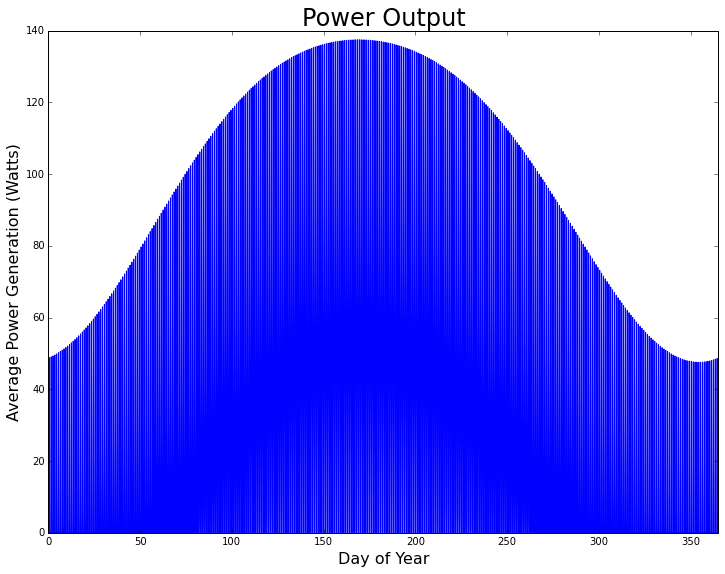

In [7]:

# coding: utf-8

# In[242]:

# Import Libraries

import numpy as np
import sympy as sp
from sympy import *
x, y, z, t, Day_Of_Year  = symbols('x y z t Day_Of_Year')
import pandas as pd
from pandas import set_option # Option to restrict display
set_option('display.max_rows',15)
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
get_ipython().magic('matplotlib inline')


# In[243]:

# Defining constants
S0 = 1367.63 # Solar constant
Dis_n = [0,1,2]
Dis_an = [1.00011,0.034221,0.000719]
Dis_bn = [0,0.00128,0.000077]
Dec_n = [0,1,2,3]
Dec_an = [0.006918,-0.399912,-0.006758,-0.002697]
Dec_bn = [0,0.070257,0.000907,0.00148]
Lattitude = 49.7
Area = 1.6368 # Area in m^2 that is to be covered by solar panels. 1.6368 for 255 W panel
Atm = .75 # Proportion of solar energy that makes it to the earth's surface
Panel_Efficiency = .16 # Efficiency of solar panels in converting solar energy to electricity
radiation_through_clouds = 0.7


# First, I'm going to define a function that will print the power (watts per square meter)that the earth would receive from the sun if there were no atmosphere.

# In[ ]:




# In[244]:

def Solar_Power_Calculator(Day_Of_Year,Lattitude,Hour_of_Day):
    '''This function will tell you how much power the sun is radiating on one square meter
    of the earth when it is sunny in any location in the world at any time.
    Inputs: Day_Of_Year, Lattitude, Hour_of_Day
    Output: Power (watts)'''
    # Make some assertions about the inputs of the function.
    assert 0 < Day_Of_Year <= 365, 'Day of year must be from 1 through 365.'
    
    # Hour_of_Day input is from 0 through 24, but we need hours in a different form for our 
    # calculations.
    if Hour_of_Day >= 12:
        hour = Hour_of_Day - 12
    elif Hour_of_Day < 12:
        hour = 12 - Hour_of_Day
    # Calculating Theta D
    ThetaD = (2*np.pi*Day_Of_Year)/365
    # Calculating distance
    # Constants for calculating distance
    Dis_n = [0,1,2]
    Dis_an = [1.00011,0.034221,0.000719]
    Dis_bn = [0,0.00128,0.000077]

    Dis1 = Dis_an[0]*np.cos(Dis_n[0]*ThetaD)+Dis_bn[0]*np.sin(Dis_n[0]*ThetaD)
    Dis2 = Dis_an[1]*np.cos(Dis_n[1]*ThetaD)+Dis_bn[1]*np.sin(Dis_n[1]*ThetaD)
    Dis3 = Dis_an[2]*np.cos(Dis_n[2]*ThetaD)+Dis_bn[2]*np.sin(Dis_n[2]*ThetaD)

    # Calculate Distance
    Distance = Dis1+Dis2+Dis3

    # Constants for calculating declination
    Dec_n = [0,1,2,3]
    Dec_an = [0.006918,-0.399912,-0.006758,-0.002697]
    Dec_bn = [0,0.070257,0.000907,0.00148]

    Dec1 = Dec_an[0]*np.cos(Dec_n[0]*ThetaD)+Dec_bn[0]*np.sin(Dec_n[0]*ThetaD)
    Dec2 = Dec_an[1]*np.cos(Dec_n[1]*ThetaD)+Dec_bn[1]*np.sin(Dec_n[1]*ThetaD)
    Dec3 = Dec_an[2]*np.cos(Dec_n[2]*ThetaD)+Dec_bn[2]*np.sin(Dec_n[2]*ThetaD)
    Dec4 = Dec_an[3]*np.cos(Dec_n[3]*ThetaD)+Dec_bn[3]*np.sin(Dec_n[3]*ThetaD)


    # Calculate Dec_radians
    Dec_radians = Dec1+Dec2+Dec3+Dec4
    Dec_degrees = np.degrees(Dec_radians)

    # For Hour Angle
    Hour_angle = np.radians(hour*15)

    # For Radians and Cos Solar Zenith Angle
    radians = (np.pi/180)*Lattitude
    CSZA = np.sin(radians)*np.sin(Dec_radians)+np.cos(radians)*np.cos(Dec_radians)*np.cos(Hour_angle)# Cos Solar Zenith Angle
    # When the sun is down, CSZA is negative, but we want it to be zero (because when the sun
    # is down, it isn't radiating on that location.
    if CSZA < 0:
        CSZA = 0
    # Calculate Energy/Area (W/m^2)
    Watts_Per_SqMeter = S0*Distance*CSZA*Atm

    return(Watts_Per_SqMeter)


# In[245]:

Solar_Power_Calculator(160,-49,12)


# Now I'm going to take the above function and do the same thing except make it print the number of Wh in one square meter for a year.

# In[246]:

# Making a list called of Theta D for every day of the year
def ThetaD():
    year = list(range(1,366))
    ThetaD_list = []
    for i in year:
        ThetaD_list.append((2*np.pi*i)/365)
    return(ThetaD_list)


# In[247]:

ThetaD_list = ThetaD()


# In[248]:

def Solar_Energy_Calculator(latitude, panel_efficiency, area):
    '''This function calculates the energy that can be generated in any given place in the 
    world over one year sans clouds.  
    Inputs: lattitude, panel_efficiency (a number between 0 and 1), and area (of solar panels
    in square meters).'''
    
    # Make some assertions about the inputs of the function.
    assert -90 <= latitude <= 90, 'Latitude must be between -90 and 90.'
    assert 0 <= panel_efficiency <= 1, 'Panel efficiency must be between 0 and 1.'
    assert area > 0, 'Area of solar panel array must be greater than 0.'
    
    
    # Making Distance and Dec_radians lists for each day of the year
    radians = np.pi/180*latitude
    Hours = [12,11,10,9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8,9,10,11] # A list of all the hours of the day
    Solar_Flux = 0 # Energy generated from given area of solar panels in one hour
    Watts_Every_Hour = [] # A list that will become the Wh/m^2 every hour for a year
    kWh = 0 # A number that will become the total kWh in one place in one year.
    for i in ThetaD_list:
        # Calculate the Distance
        Dis1 = Dis_an[0]*np.cos(Dis_n[0]*i)+Dis_bn[0]*np.sin(Dis_n[0]*i)
        Dis2 = Dis_an[1]*np.cos(Dis_n[1]*i)+Dis_bn[1]*np.sin(Dis_n[1]*i)
        Dis3 = Dis_an[2]*np.cos(Dis_n[2]*i)+Dis_bn[2]*np.sin(Dis_n[2]*i)
        Distance = Dis1+Dis2+Dis3
        # Calculate the Declination
        Dec1 = Dec_an[0]*np.cos(Dec_n[0]*i)+Dec_bn[0]*np.sin(Dec_n[0]*i)
        Dec2 = Dec_an[1]*np.cos(Dec_n[1]*i)+Dec_bn[1]*np.sin(Dec_n[1]*i)
        Dec3 = Dec_an[2]*np.cos(Dec_n[2]*i)+Dec_bn[2]*np.sin(Dec_n[2]*i)
        Dec4 = Dec_an[3]*np.cos(Dec_n[3]*i)+Dec_bn[3]*np.sin(Dec_n[3]*i)
        Dec_radians = Dec1+Dec2+Dec3+Dec4
        Dec_degrees = (np.degrees(Dec_radians))
        for i in Hours:
            Hour_angle = np.radians(i*15)
            CSZA = (np.sin(radians)*np.sin(Dec_radians)) + (np.cos(radians)*np.cos(Dec_radians)*np.cos(Hour_angle))
            if CSZA < 0:
                CSZA = 0
            Solar_Flux = (S0)*Distance*CSZA*Atm*panel_efficiency*area
            Watts_Every_Hour.append(Solar_Flux)
    return(Watts_Every_Hour)


# In[249]:

Watts = Solar_Energy_Calculator(49,.16,1.6)


# In[ ]:




# # Loading Cloud Data

# The cloud cover data I am using is International Satellite Cloud Climatology Project (ISCCP). To understand this data in its raw form, visualize a map of the world overlayed by a grid of squares.  Each square is 2.5 degrees in width and height, so the grid is 144 x 72 (longitude x latitude) and has a total of 10368 squares. Each number in the data is the average annual cloud cover percentage for a single square. The first number represents average cloud cover  in the -90 degrees latitude, -180 degrees longitude box. Longitude varies first, and begins at -180 degrees and proceeds eastward to +180 degrees. Latitude begins at -90 degrees and proceeds northward to +90 degrees.

# In[250]:

# First, I'm loading the raw cloud cover data.
cloud_dat = pd.read_table('../data/weather.txt',sep='\s+')


# In[251]:

cloud_dat


# In[ ]:

# Right now the data is in 1 row and 10368 columns, so it requires some 
# cleaning up
cloud_dat.shape


# In[ ]:

# After transposing, the data is in 1 column and 10368 rows
cloud_dat = cloud_dat.transpose()
cloud_dat.shape


# In[ ]:

# Now I will change the name of the column of data and reset the index
cloud_dat = cloud_dat.reset_index()
cloud_dat.columns=['cloud_ratio']
# Here is a glimpse of what the data looks like now
cloud_dat


# In[ ]:

# Next, I load a dataframe that I created in excel with three columns 
# (month, lattitude, and longitude) that have been filled in to line up 
# with the 'data' object.  
clouds = pd.read_excel('../data/blank_weather.xlsx',sep='\s+')
clouds


# In[ ]:

# Now, we will add a fourth column to 'clouds' that is our data
clouds['cloud_ratio'] = cloud_dat['cloud_ratio']
clouds


# Now, 'clouds' is a nice looking dataframe that includes lattitude, longitude, and average sun that gets through the clouds for every month and the entire world

# Now I will make a function that takes lattitude and longitude as an input and returns sun_ratio for each month as an output

# In[ ]:

Watts = Solar_Energy_Calculator(49.7,.16,1.68)


# In[ ]:

def find_sun(lat,long):
    '''This function finds the ratio of clouds for any lattitude and longitude and converts
    it into the ratio of radiation that reaches the earth.
    inputs: lattitude, longitude
    output: radiation ratio'''
    x = clouds.loc[(clouds['lattitude'] <= lat) & (clouds['lattitude'] > (lat-2.5)) & (clouds['longitude'] <= long) & (clouds['longitude'] > (long-2.5))]
    radiation_ratio = 1-((float(x.iloc[0,2])*0.6)/100)
    return(radiation_ratio)


# In[ ]:

radiation = find_sun(49,-123)
radiation


# In[ ]:

def apply_clouds(watts,radiation):
    '''This function takes a list of watts without clouds and radiation ratio due to clouds
    and gives you a list of the real solar generation prediction.'''
    energy = []
    for i in Watts:
        energy.append(i*radiation)
    return(energy)


# In[ ]:

final = apply_clouds(Watts,radiation)
kWh = sum(final)/1000


# In[ ]:

final = pd.DataFrame(final)
final = final.reset_index()
final.columns=['Day','Power']
final['Day'] = final['Day']/24
final


# # Making a Table of production each month

# In[ ]:

jan = sum(final.Power[0:744])
feb = sum(final.Power[744:1416])
mar = sum(final.Power[1416:2160])
apr = sum(final.Power[2160:2880])
may = sum(final.Power[2880:3620])
jun = sum(final.Power[3620:4344])
jul = sum(final.Power[4344:5088])
aug = sum(final.Power[5088:5832])
sep = sum(final.Power[5832:6552])
ocb = sum(final.Power[6552:7296])
nov = sum(final.Power[7296:8016])
dec = sum(final.Power[8016:8760])


# In[ ]:




# In[ ]:




# #Making a Plot of the Data

# In[ ]:

# change figure size
plt.figure(figsize=(12,9))

# add data to plot (x-axis, y-axis, )
plt.plot(final['Day'],final['Power'],color='b',linestyle='-')

# add title
plt.title('Power Output',fontsize=24)

# modify axis limits
plt.xlim(0,365)

# add axis labels
plt.ylabel('Average Power Generation (Watts)',fontsize=16)
plt.xlabel('Day of Year',fontsize=16)

# save figure to graphs directory
plt.savefig('TEST.pdf')
pylab.savefig("../results/Power_Output.png")

# show plot
plt.show()


# In[ ]:





,000048.818,000048.818.1,000048.818.2,000048.818.3,000048.818.4,000048.818.5,000048.818.6,000048.818.7,000048.818.8,000048.818.9,...,000065.317.39,000065.317.40,000065.317.41,000065.317.42,000065.317.43,000065.317.44,000065.317.45,000065.317.46,000065.317.47,000065.317.48


(0, 10368)